# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Pindwa Pradana Nayottama
- **Email:** nayopindwa321@gmail.com
- **ID Dicoding:** pindwanayottama123

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi penyewaan sepeda pengguna registered pada rentang waktu 2011 hingga 2012?
- Bagaimana perbandingan rata-rata jumlah peminjaman sepeda antara hari kerja dan hari libur selama tahun 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

pada tahap ini saya akan mengimpor dataset yang telah dikumpulkan yaitu day.csv 

Memuat tabel day

In [2]:
day_df = pd.read_csv('data/day.csv')
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


### Assessing Data

Memeriksa tipe data tiap kolomn dataset day.csv dan hour.csv

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


bisa dilihat dtype kolomn dteday adalah object, seharusnya ini datetime

In [4]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

bisa dilihat bahwa tidak ada missing value

In [5]:
print("Jumlah duplikat: ", day_df.duplicated().sum())

Jumlah duplikat:  0


tidak ada data duplikat

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


memeriksa parameter statistik dari kolomn numerik di dalam day_df

### Cleaning Data

In [7]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

disini saya mengubah object data kolom dteday ke datetime 

In [8]:
kategori_cols = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
day_df[kategori_cols] = day_df[kategori_cols].astype('category')

disini saya melakukan konversi kolom season, holiday, weekday, workingday, dan weathersit ke tipe data kategori karena kolom-kolom tersebut merepresentasikan kelas atau label, bukan nilai numerik yang digunakan untuk perhitungan matematis. dengan mengubahnya menjadi kategori, ini mempermudah proses visualisasi data nanti

In [9]:
day_df['year_month'] = day_df['dteday'].dt.to_period('M')

disini saya ingin membuat kolom baru yang merepresentasikan kombinasi bulan dan tahun dari tanggal pada kolom dteday. kolom bakal memudahkan saya dalam melakukan analisis tren bulanan, seperti melihat perubahan jumlah pengguna terdaftar dari waktu ke waktu, serta memastikan bahwa data dikelompokkan dan diurutkan berdasarkan urutan waktu yang benar, bukan urutan alfabet.

In [10]:
monthly_registered = day_df.groupby('year_month')['registered'].sum().reset_index()

disini saya mengelompokkan data berdasarkan bulan (year_month) lalu menjumlahkan total pengguna terdaftar (registered) di setiap bulan, sehingga dapat melihat jumlah pengguna per bulan secara keseluruhan. membantu juga untuk visualisasi nanti

In [11]:
monthly_registered['year_month'] = monthly_registered['year_month'].astype(str)

disini saya mengubah kolom year_month dari tipe Period ke string supaya mudah ditampilkan sebagai label di grafik, terutama di sumbu-x saat memplot tren bulanan pengguna terdaftar.

In [12]:
day_df = day_df[day_df['workingday'].isin([0, 1])]

disini saya memfilter data day_df supaya hanya menyimpan baris yang nilai kolom workingday adalah 0 atau 1 saja

In [13]:
day_df = day_df[day_df['cnt'] >= 0]

disini saya memfilter data day_df supaya hanya menyimpan baris yang nilai kolom cnt (jumlah peminjaman sepeda) adalah nol atau lebih besar

In [14]:
day_2012_df = day_df[day_df['dteday'].dt.year == 2012]
workingday_avg = day_2012_df.groupby('workingday')['cnt'].mean().reset_index()
holiday_avg = day_2012_df.groupby('holiday')['cnt'].mean().reset_index()

C:\Users\nayop\AppData\Local\Temp\ipykernel_22324\1705340357.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_avg = day_2012_df.groupby('workingday')['cnt'].mean().reset_index()
C:\Users\nayop\AppData\Local\Temp\ipykernel_22324\1705340357.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_avg = day_2012_df.groupby('holiday')['cnt'].mean().reset_index()


## Exploratory Data Analysis (EDA)

### Explore data day_df

In [15]:
day_df[['cnt', 'registered', 'casual', 'temp', 'atemp', 'hum', 'windspeed']].describe()

,cnt,registered,casual,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,4504.348837,3656.172367,848.176471,0.495385,0.474354,0.627894,0.190486
std,1937.211452,1560.256377,686.622488,0.183051,0.162961,0.142429,0.077498
min,22.000000,20.000000,2.000000,0.059130,0.079070,0.000000,0.022392
25%,3152.000000,2497.000000,315.500000,0.337083,0.337842,0.520000,0.134950
50%,4548.000000,3662.000000,713.000000,0.498333,0.486733,0.626667,0.180975
75%,5956.000000,4776.500000,1096.000000,0.655417,0.608602,0.730209,0.233214
max,8714.000000,6946.000000,3410.000000,0.861667,0.840896,0.972500,0.507463


In [16]:
if 'year_month' not in day_df.columns:
    day_df['year_month'] = day_df['dteday'].dt.to_period('M').astype(str)

monthly_cnt = day_df.groupby('year_month')['cnt'].sum().reset_index()
monthly_cnt.head(24)

,year_month,cnt
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821
5,2011-06,143512
6,2011-07,141341
7,2011-08,136691
8,2011-09,127418
9,2011-10,123511


Penjualan sepeda meningkat dari 2011 ke 2012 dengan puncak di Agustus-September. Musim panas dan awal gugur jadi waktu peminjaman tertinggi, sedangkan akhir tahun menurun akibat cuaca. Tahun 2012 lebih ramai dibanding 2011.

In [17]:
day_2012_df = day_df[day_df['dteday'].dt.year == 2012]

workingday_summary_2012 = day_2012_df.groupby('workingday')['cnt'].mean().reset_index()
workingday_summary_2012

C:\Users\nayop\AppData\Local\Temp\ipykernel_22324\4080908639.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_summary_2012 = day_2012_df.groupby('workingday')['cnt'].mean().reset_index()


,workingday,cnt
0,0,5288.189655
1,1,5744.584000


Dari data tahun 2012, rata-rata peminjaman sepeda pada hari kerja (workingday=1) lebih tinggi, yaitu sekitar 5745 peminjaman per hari, dibandingkan hari non-kerja (workingday=0) yang sekitar 5288 peminjaman per hari. Ini menunjukkan bahwa penggunaan sepeda cenderung lebih aktif saat hari kerja.

In [18]:
day_df[['casual', 'registered']].mean()

casual         848.176471
registered    3656.172367
dtype: float64

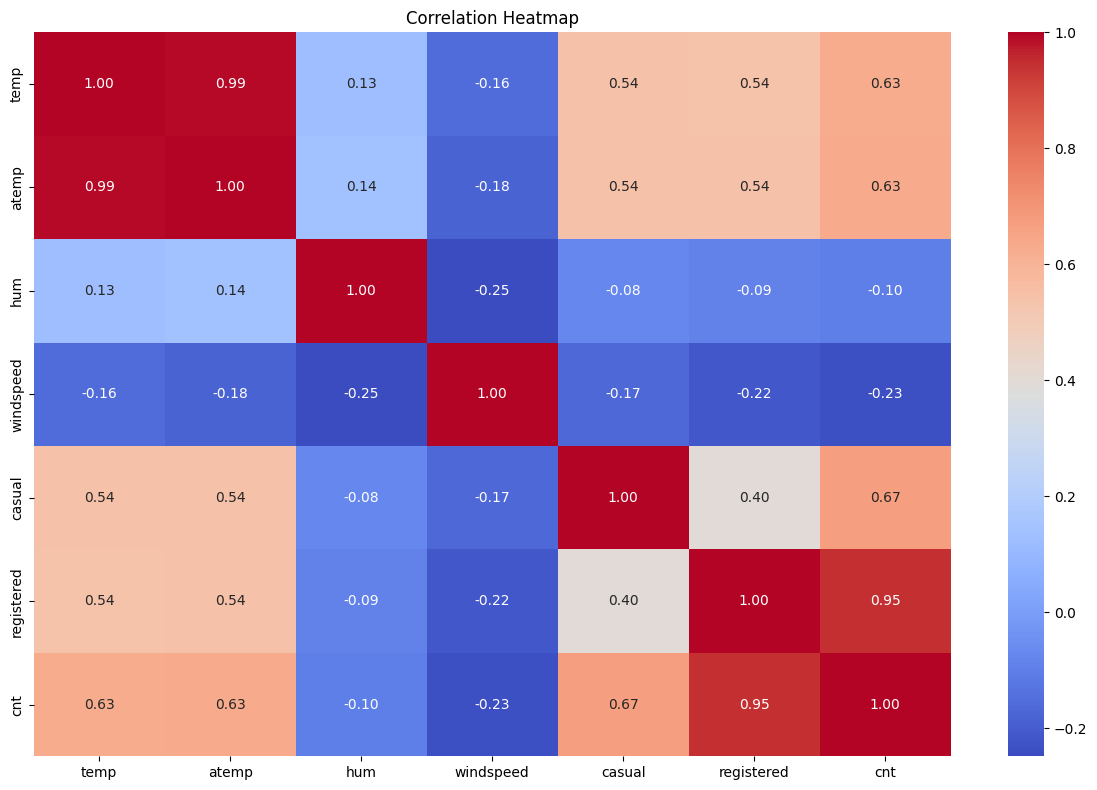

In [19]:
plt.figure(figsize=(12, 8))
correlation = day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Terdapat korelasi kuat antara registered dan cnt, serta antara temp dan atemp. Sementara itu, kelembapan dan kecepatan angin memiliki pengaruh yang lebih rendah terhadap jumlah pengguna.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi penyewaan sepeda pengguna registered pada rentang waktu 2011 hingga 2012?

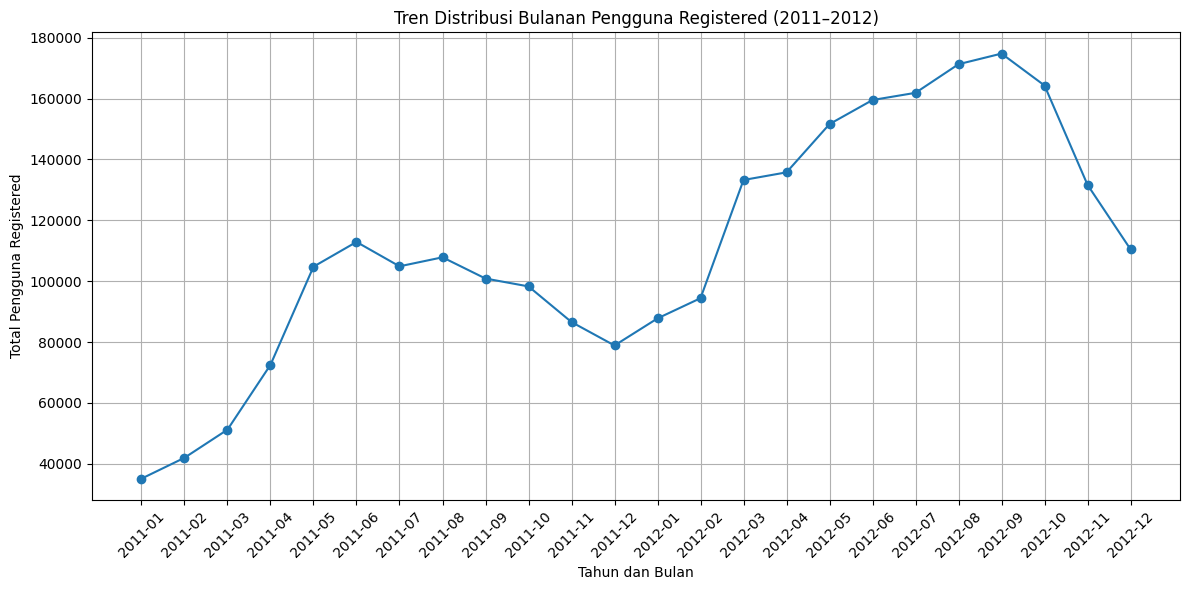

In [20]:
plt.figure(figsize=(12,6))
plt.plot(monthly_registered['year_month'], monthly_registered['registered'], marker='o')
plt.xticks(rotation=45)
plt.title('Tren Distribusi Bulanan Pengguna Registered (2011–2012)')
plt.xlabel('Tahun dan Bulan')
plt.ylabel('Total Pengguna Registered')
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan gambar di atas dapat dilihat bahwa:

Jumlah pengguna registered meningkat tajam dari Januari hingga Juni 2011, menunjukkan awal yang kuat dalam adopsi layanan.

Mulai Juli hingga Desember 2011 terjadi penurunan yang cukup konsisten, kemungkinan karena faktor musiman atau libur akhir tahun.

Pada awal 2012, jumlah pengguna kembali naik secara signifikan, terutama dari Januari hingga Maret.

Puncak tertinggi penggunaan terjadi sekitar September–Oktober 2012, dengan total pengguna registered mencapai hampir 190.000.

Setelah Oktober 2012, jumlah pengguna menurun tajam hingga Desember.

### Pertanyaan 2: Bagaimana perbandingan rata-rata jumlah peminjaman sepeda antara hari kerja dan hari libur selama tahun 2012?

C:\Users\nayop\AppData\Local\Temp\ipykernel_22324\1073741560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=workingday_avg, x='workingday', y='cnt', palette='pastel')


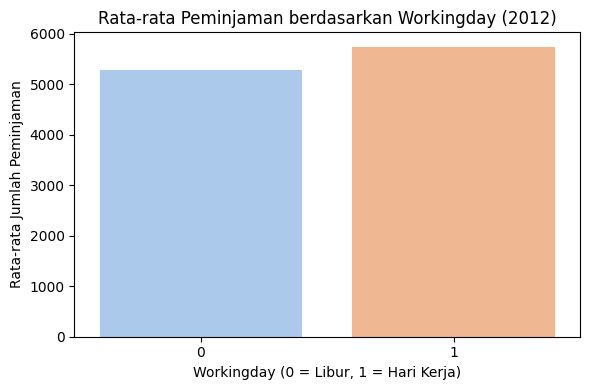

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(data=workingday_avg, x='workingday', y='cnt', palette='pastel')
plt.title('Rata-rata Peminjaman berdasarkan Workingday (2012)')
plt.xlabel('Workingday (0 = Libur, 1 = Hari Kerja)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.tight_layout()
plt.show()

Berdasarkan gambar di atas dapat dilihat bahwa:

Hari kerja (workingday = 1) menunjukkan rata-rata peminjaman sepeda lebih tinggi dibandingkan hari libur biasa (workingday = 0).

C:\Users\nayop\AppData\Local\Temp\ipykernel_22324\4007296685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_avg, x='holiday', y='cnt', palette='muted')


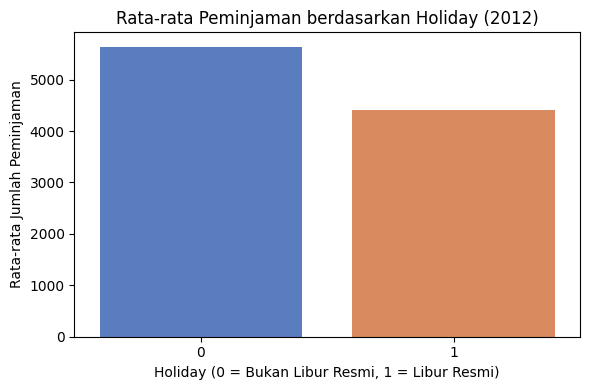

In [22]:
plt.figure(figsize=(6,4))
sns.barplot(data=holiday_avg, x='holiday', y='cnt', palette='muted')
plt.title('Rata-rata Peminjaman berdasarkan Holiday (2012)')
plt.xlabel('Holiday (0 = Bukan Libur Resmi, 1 = Libur Resmi)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.tight_layout()
plt.show()

Dari gambar di atas dapat dilihat bahwa:

Rata-rata peminjaman lebih rendah pada hari libur resmi (holiday = 1) dibandingkan hari biasa (holiday = 0).

## Conclusion

## Pertanyaan 1 : Bagaimana distribusi penyewaan sepeda pengguna registered pada rentang waktu 2011 hingga 2012?##
## Pertanyaan 2 : Bagaimana perbandingan rata-rata jumlah peminjaman sepeda antara hari kerja dan hari libur selama tahun 2012?##

**Conclusion pertanyaan 1 :** Distribusi penyewaan sepeda menunjukkan pola musiman yang cukup konsisten. Terjadi peningkatan signifikan pada awal tahun dan puncak aktivitas pada pertengahan hingga akhir kuartal ketiga, diikuti penurunan di akhir tahun. Ini menandakan adanya tren penggunaan yang tinggi di musim panas dan menurun di musim dingin atau akhir tahun.

**Rekomendasi untuk pertanyaan 1 :** Pertimbangkan strategi khusus (diskon atau event) untuk meningkatkan penggunaan saat musim sepi.

**Conclusion pertanyaan 2 :** Peminjaman sepeda lebih banyak di hari kerja dibanding hari libur. Artinya, banyak orang pakai sepeda buat kegiatan harian kayak ke kantor atau kampus, bukan sekadar buat jalan-jalan.

**Rekomendasi untuk pertanyaan 2 :** Pastikan sepeda cukup tersedia di hari kerja, apalagi pas jam sibuk pagi dan sore.